<a href="https://colab.research.google.com/github/abdullahalasif25/Deep-Learning/blob/main/Handwritten_Character_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Character Recognition model
We will use the EMNIST dataset that includes handwritten letters.

In [2]:
#Importing required modules

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

### Load the EMNIST Dataset (Letters)

In [3]:
import tensorflow_datasets as tfds

#Load the 'menist/letters' dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train','test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.C4O4P9_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.C4O4P9_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.


### Normalize the Data

In [4]:
def normalize_img(image,label):
  image=tf.cast(image,tf.float32)/255.0
  return image,label

#Apply the normalization
ds_train=ds_train.map(normalize_img)
ds_test=ds_test.map(normalize_img)

### Prepare the dataset for training

In [5]:
batch_size=64

# Shuffle, batch and prefetch for better performance
ds_train=ds_train.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test=ds_test.batch(batch_size).prefetch(tf.data.AUTOTUNE)

### Build the model

In [6]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),                # Input shape for grayscale 28x28 image
    layers.Conv2D(32, (3, 3), activation='relu'),   # Conv layer with 32 filters
    layers.MaxPooling2D((2, 2)),                    # Downsample the image
    layers.Conv2D(64, (3, 3), activation='relu'),   # Another conv layer
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),                               # Flatten to 1D vector
    layers.Dense(128, activation='relu'),           # Dense layer with 128 neurons
    layers.Dense(27, activation='softmax')          # Output layer (26 letters + 1 unknown = 27)
])


### Compile the model

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [8]:
model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 97s 68ms/step - accuracy: 0.7256 - loss: 0.9304 - val_accuracy: 0.8885 - val_loss: 0.3485
Epoch 2/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 86s 62ms/step - accuracy: 0.9039 - loss: 0.2903 - val_accuracy: 0.9078 - val_loss: 0.2757
Epoch 3/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 86s 62ms/step - accuracy: 0.9247 - loss: 0.2236 - val_accuracy: 0.9097 - val_loss: 0.2582
Epoch 4/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9343 - loss: 0.1896 - val_accuracy: 0.9161 - val_loss: 0.2486
Epoch 5/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 150s 66ms/step - accuracy: 0.9430 - loss: 0.1616 - val_accuracy: 0.9172 - val_loss: 0.2517


### Evalute the model

In [9]:
test_loss, test_acc = model.evaluate(ds_test)
print(f"\nTest Accuracy: {test_acc:.2f}")


232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9183 - loss: 0.2511

Test Accuracy: 0.92


### Predict a Sample Image

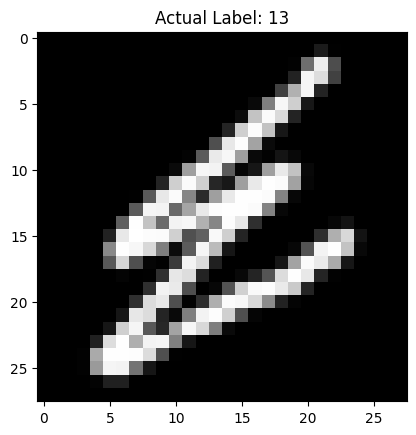

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted Label: 13


In [10]:
for image, label in ds_test.take(1):  # Take one batch
    plt.imshow(image[0].numpy().squeeze(), cmap='gray')  # Show first image
    plt.title("Actual Label: " + str(label[0].numpy()))
    plt.show()

    prediction = model.predict(tf.expand_dims(image[0], 0))  # Predict single image
    predicted_label = np.argmax(prediction)
    print("Predicted Label:", predicted_label)


### EMNIST labels start from 1 to 26 (i.e., A=1, B=2, ..., Z=26). So, to get actual letters:

In [11]:
print("Predicted Character:", chr(predicted_label + 64))  # A=65 in ASCII

Predicted Character: M
